In [66]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData, UVCal, UVFlag, utils
from glob import glob
from astropy import units as u
from astropy import constants as c
from astropy.time import Time
from astropy.coordinates import get_body, SkyCoord, AltAz, EarthLocation, Angle
from copy import deepcopy

In [67]:
JD = '2457548'
rawpath = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/'
calpath = '/lustre/aoc/projects/hera/agavidia/TimeVariability/CalFitsFix/'

In [68]:
juldate = '2457548.18782'

In [69]:
uvd = UVData()
uvd.read(rawpath+JD+'/zen.'+juldate+'.uvcRP.uvh5')

In [70]:
# flag.2457548.18782.ant.uvh5 has the flags from before the manual fix of some bad channels
# in the calfits files
# IMPORTANT
uvc = UVCal()
uvc.read_calfits(calpath+JD+'/zen.'+juldate+'_fixed.uvcRP.calfits')

In [71]:
uvcJ = UVCal()
uvcJ.read_calfits('/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/zen.2457548.64714.uvcRPJ.calfits') 

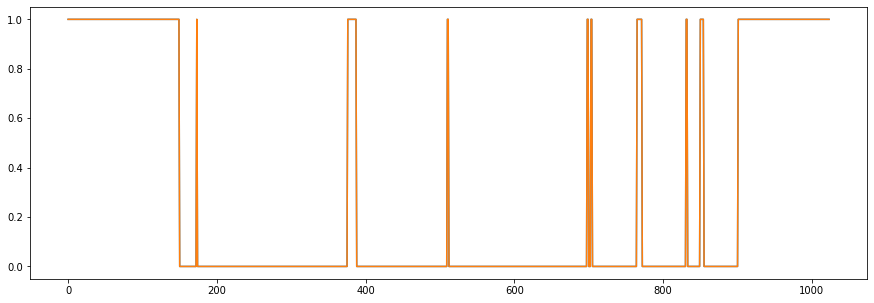

In [73]:
plt.figure(figsize=(15,5))
plt.plot(uvc.flag_array[0,0,:,0,0])
plt.plot(uvcJ.flag_array[0,0,:,0,0])
plt.show()

In [75]:
uvf_ant = UVFlag(uvc, mode='flag', copy_flags=True)

In [76]:
uvf_ant.flag_array[0,0,376,0,0]

True

In [77]:
uvf_ant.flag_array.shape

(19, 1, 1024, 56, 2)

In [78]:
np.unique(uvd.ant_1_array)

array([  9,  10,  20,  22,  31,  43,  53,  64,  65,  72,  80,  81,  88,
        89,  96,  97, 104, 105, 112])

In [79]:
test_flags = uvd.get_flags((9,10,'xx'))

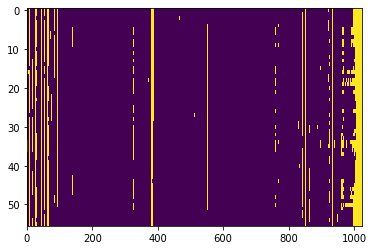

In [80]:
plt.imshow(test_flags, aspect='auto')

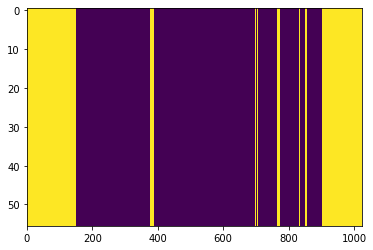

In [81]:
plt.imshow(uvf_ant.flag_array[0,0,:,:,0].T, aspect='auto')

In [93]:
uvd.flag_array.shape

(10640, 1, 1024, 4)

In [92]:
uvc.flag_array.shape

(19, 1, 1024, 56, 2)

In [105]:
# IMPORTANT
uvd_calibrated = deepcopy(uvd)
uvd_calibrated.flag_array = np.zeros_like(uvd.flag_array, dtype='bool')

In [107]:
uvd_calibrated.flag_array.shape

(10640, 1, 1024, 4)

In [108]:
# IMPORTANT
utils.uvcalibrate(uvd_calibrated, uvc, inplace=True, prop_flags=True)

In [109]:
test_flags_calibrated = uvd_calibrated.get_flags((9,10,'xx'))

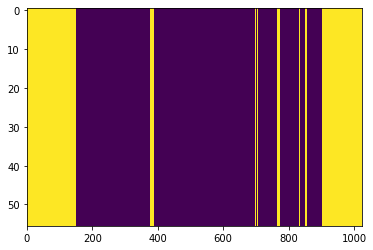

In [110]:
plt.imshow(test_flags_calibrated, aspect='auto')

In [117]:
# IMPORTANT
uvf_or = UVFlag(rawpath+JD+'/flag.'+juldate+'.or.uvh5', mode='flag', copy_flags=True)

In [119]:
uvf_or.flag_array.shape

(56, 1024, 1)

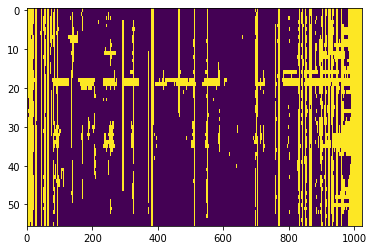

In [121]:
plt.imshow(uvf_or.flag_array.squeeze(), aspect='auto')

In [122]:
# IMPORTANT
uvd_cal_flag = utils.apply_uvflag(uvd_calibrated, uvf_or, inplace=False, unflag_first=False)

In [123]:
test_cal_flag = uvd_cal_flag.get_flags((9,10,'xx'))

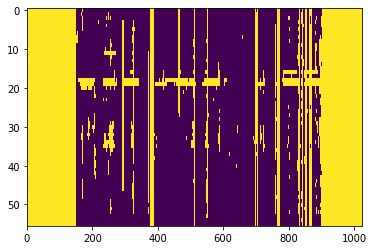

In [124]:
plt.imshow(test_cal_flag, aspect='auto')

divide by zero encountered in true_divide
invalid value encountered in true_divide


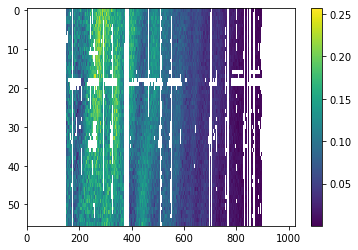

In [133]:
uncal = uvd.get_data((9,10,'xx'))
plt.imshow(np.abs(uncal)/~test_cal_flag, aspect='auto')
plt.colorbar()

divide by zero encountered in true_divide
invalid value encountered in true_divide


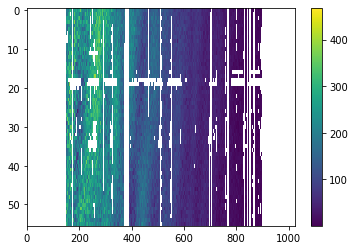

In [134]:
cal = uvd_cal_flag.get_data((9,10,'xx'))
plt.imshow(np.abs(cal)/~test_cal_flag, aspect='auto')
plt.colorbar()